<a href="https://colab.research.google.com/github/Shah-in-alam/AI-Basic-to-Advance/blob/main/Supportive_Vector_Machine_(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Supportive Vector Machine (SVM)
SVM is a supervised learning algorithm used for classification and regression tasks. it works by finding the optimal hyperlink that best seperates the data into classes.
## How it works (classlification)

### The goal of SVM is to maximize the margine between the two classes
### The support vectors are the data points the lie closest to the
### it can also use kernels to handle no-linearly separable data by transforming it into higher dimensions.

📘 SVM key Concepts
#-------------------------------------------------------------
Concepts                                      Description
#------------------------------------------------------------------
#### Hyperplane           -> Descison bonundary between classes
#### Margine    ---> Distance between hyperpalne and the nearest point from either class.
#### Kernal Trick      --> Transforms data into higher dimensions (e.g polynomial , RBF) to make it separeteable.
### Support vectors ---> Points cloeset to the hyperpalne; critical in denfinig the boundary.





### lets dive into the code

In [6]:
from sklearn  import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib import pyplot as plt
import numpy as np


In [7]:
#Load example datasets
iris = datasets.load_iris()
X = iris.data[:,:2] #use only first two features for visualization
y =(iris.target !=0)* 1 #Convert to binary (0 vs not 0)

#split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#train model
model =SVC(kernel ='linear')
model.fit(X_train,y_train)

#Evaluate
accuracy =model.score(X_test,y_test)
print(f"Test Accuracy: {accuracy}")




Test Accuracy: 1.0


/tmp/ipython-input-8-2814945667.py:15: UserWarning: The following kwargs were not used by contour: 'linestyels'
  ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])


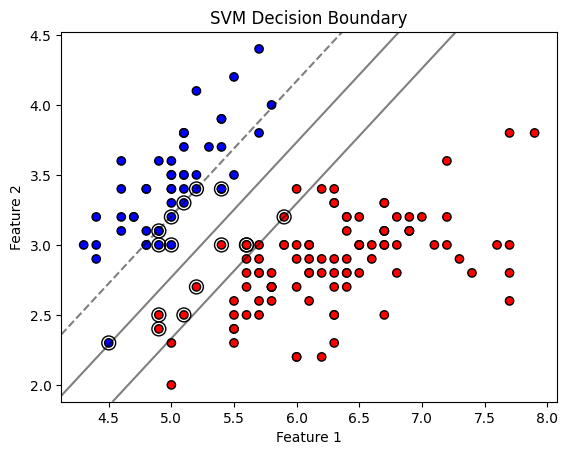

In [8]:
#Ploat decision boundary (only works for 2D features)
def plot_svm(model,X,y):
  plt.scatter(X[:,0],X[:,1],c=y,cmap='bwr',edgecolors='k')
  ax=plt.gca()
  xlim=ax.get_xlim()
  ylim=ax.get_ylim()
  #create grid to evaluate model
  xx=np.linspace(xlim[0],xlim[1],50)
  yy=np.linspace(ylim[0],ylim[1],50)
  YY,XX=np.meshgrid(yy,xx)
  xy=np.vstack([XX.ravel(),YY.ravel()]).T
  Z=model.decision_function(xy).reshape(XX.shape)

  #Ploat boundaries and mergine
  ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])
  ax.scatter(model.support_vectors_[:,0],model.support_vectors_[:,1],s=100,linewidth=1,facecolors='none',edgecolors='k')
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("SVM Decision Boundary")
  plt.show()

plot_svm(model,X,y)

#SVM with RBF Kernel (Non-linear)


RBF Kernel Accuracy: 1.0


/tmp/ipython-input-8-2814945667.py:15: UserWarning: The following kwargs were not used by contour: 'linestyels'
  ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])


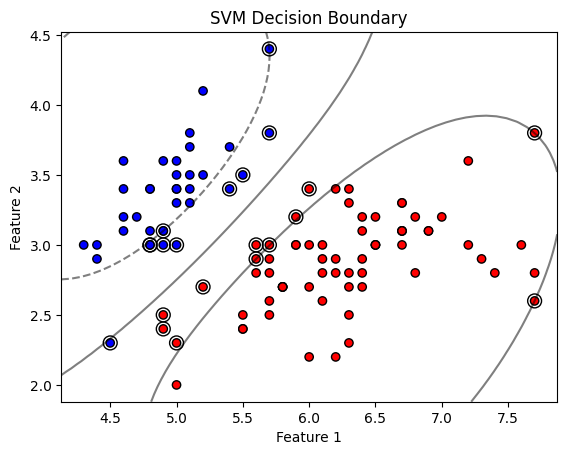

In [11]:
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data[:, :2]  # 2 features. take only 2 features
y = (iris.target != 0).astype(int)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
model_rbf =SVC(kernel ='rbf',gamma='auto')
model_rbf.fit(X_train,y_train)
print("RBF Kernel Accuracy:",model_rbf.score(X_test,y_test))
plot_svm(model_rbf,X_train,y_train)

#SVM with Polynomial kernel

Polynomial Kernel Accuracy:  1.0


/tmp/ipython-input-8-2814945667.py:15: UserWarning: The following kwargs were not used by contour: 'linestyels'
  ax.contour(XX,YY,Z,colors='k',levels=[-1,0,1],alpha=0.5,linestyels=['--','-','--'])


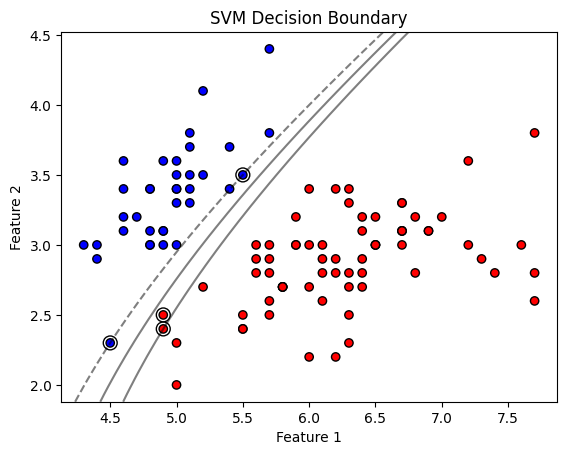

In [13]:
model_poly = SVC(kernel='poly',degree=3, C=1)
model_poly.fit(X_train,y_train)

print("Polynomial Kernel Accuracy: ",model_poly.score(X_test,y_test))
plot_svm(model_poly,X_train,y_train)

#SVM with PCA (All 4 features ->2D plot)


PCA + SVM Accuracy:  0.9666666666666667


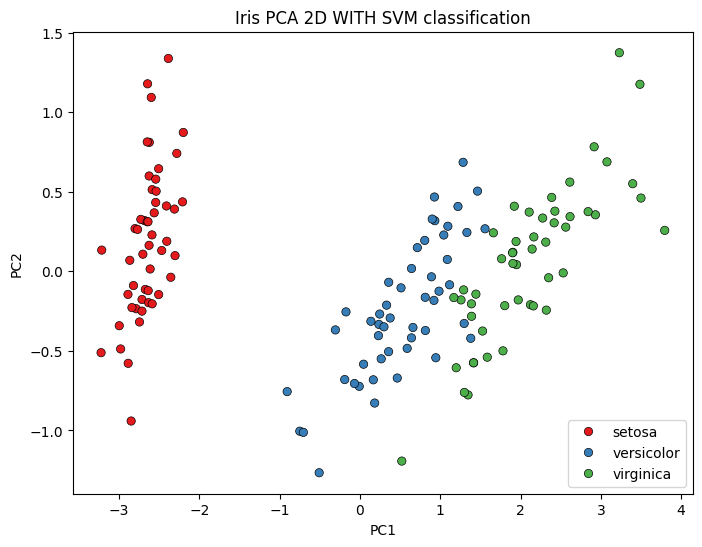

In [15]:
from sklearn.decomposition import PCA
import seaborn as sns

#Use all 4 features
X=iris.data
y=iris.target

#Reduce to 2D for ploating
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)
model_pca=SVC(kernel='linear')
model_pca.fit(X_pca,y)
print("PCA + SVM Accuracy: ", model_pca.score(X_pca,y))

#plot PCA with seaborn
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:,0],y=X_pca[:,1],hue=iris.target_names[y],palette="Set1",edgecolor='k')
plt.title("Iris PCA 2D WITH SVM classification")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

# Confusion matrix & Classification report

In [16]:
from sklearn.metrics import confusion_matrix,classification_report

#Test on actual split
y_pred=model.predict(X_test)
print("Confusion matrix: \n",confusion_matrix(y_test,y_pred))
print("\nClassifiaction Report: \n",classification_report(y_test,y_pred,target_names=["Setosa","Not-setosa"]))

Confusion matrix: 
 [[14  0]
 [ 0 31]]

Classifiaction Report: 
               precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        14
  Not-setosa       1.00      1.00      1.00        31

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



#(Bonus) Decision Boundary with Colored Regions

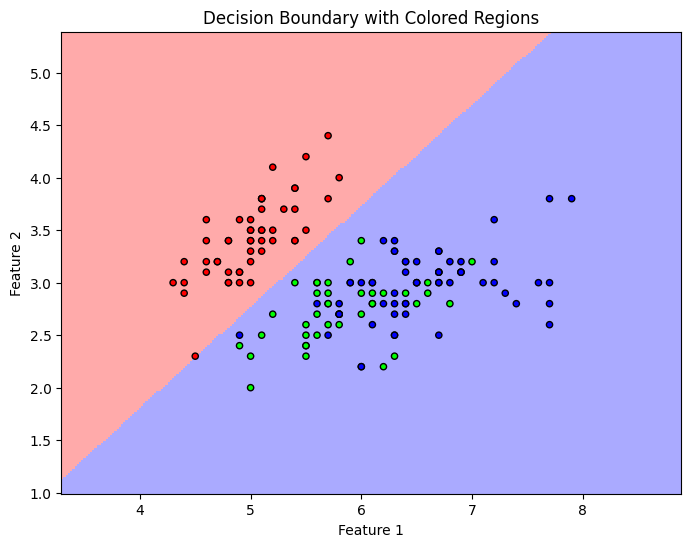

In [17]:
def plot_decision_boundary(X,y,model):
  from matplotlib.colors import ListedColormap
  cmap_light =ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  cmap_blod =ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
  h=.02
  x_min,x_max =X[:,0].min()-1,X[:,0].max()+1
  y_min,y_max =X[:,1].min()-1,X[:,1].max()+1
  xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
  Z=model.predict(np.c_[xx.ravel(),yy.ravel()])
  Z=Z.reshape(xx.shape)
  plt.figure(figsize=(8,6))
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
  plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap_blod,edgecolors='k',s=20)
  plt.xlabel("Feature 1")
  plt.ylabel("Feature 2")
  plt.title("Decision Boundary with Colored Regions")
  plt.show()

plot_decision_boundary(X,y,model)

In [18]:
pip install gradio


In [21]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load and prepare Iris dataset (2 features only)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = (iris.target != 0).astype(int)  # Binary classification

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotting function
def plot_decision_boundary(model, X, y):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 50)
    yy = np.linspace(ylim[0], ylim[1], 50)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    ax.set_title("Decision Boundary")
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")

    return fig

# Gradio interface function
def svm_gui(kernel_type):
    model = SVC(kernel=kernel_type, degree=3, gamma='scale')
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    fig = plot_decision_boundary(model, X_train, y_train)
    return f"Accuracy: {acc:.2f}", fig

# Build Gradio interface
interface = gr.Interface(
    fn=svm_gui,
    inputs=gr.Radio(["linear", "poly", "rbf", "sigmoid"], label="Kernel Type"),
    outputs=["text", gr.Plot(label="SVM Decision Boundary")],
    title="SVM Kernel Explorer on Iris Dataset"
)

interface.launch()


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://70ff15f6fd6aa2fc8e.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
import gradio as gr
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

# Load full Iris dataset (multi-class)
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only first two features for 2D plotting
y = iris.target       # Multi-class: 0, 1, 2

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plot function for multi-class
def plot_decision_regions(model, X, y):
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    fig, ax = plt.subplots(figsize=(6, 4))
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.3)
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_title("Multi-Class SVM Decision Regions")
    return fig

# Gradio interface function
def svm_gui(kernel_type, C_val, gamma_val):
    model = SVC(kernel=kernel_type, C=C_val, gamma=gamma_val, decision_function_shape='ovr')
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    fig = plot_decision_regions(model, X_train, y_train)
    return f"Accuracy: {acc:.2f}", fig

# Build the Gradio UI
interface = gr.Interface(
    fn=svm_gui,
    inputs=[
        gr.Radio(["linear", "poly", "rbf", "sigmoid"], label="Kernel Type"),
        gr.Slider(0.01, 10.0, value=1.0, label="C (Regularization)"),
        gr.Slider(0.001, 1.0, value=0.1, label="Gamma (Kernel Coefficient)")
    ],
    outputs=["text", gr.Plot(label="SVM Decision Boundary")],
    title="Interactive Multi-Class SVM Explorer (Iris Dataset)"
)

interface.launch()



It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2130830a5c11291d08.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
